<a href="https://colab.research.google.com/github/crescent98/machinelearning35911/blob/master/assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

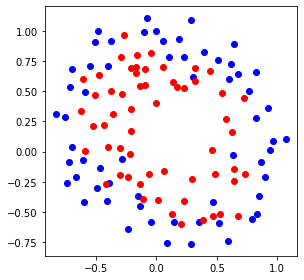

In [86]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [87]:
from scipy import misc

def function(x,y):
  return (x*x+y*x)

misc.derivative(function,3,args=(3,))

9.0

# ***Logistic Regression_Functions***

In [0]:
def z_function(theta,x,y): #[theta0, theta1, theta2, theta3, theta4, theta5, theta6, theta7]
  return (theta[0]+theta[1]*x+theta[2]*x*x+theta[3]*x*x*x+theta[4]*y+theta[5]*y*y+theta[6]*y*y*y+theta[7]*x*y)

def h_function(theta,x,y):
  return (1/(1+np.exp((-1)*z_function(theta,x,y))))

def objective_function(m,theta,data): #[x,y,i] 로 구성된 data, [theta0, theta1, ... theta6, theta7]로 구성된 theta
  sum=0
  for i in range(0,m):
    if data[i][2]==0:
      sum=sum-np.log(1-h_function(theta,data[i][0],data[i][1]))
    elif data[i][2]==1:
      sum=sum-np.log(h_function(theta,data[i][0],data[i][1]))
  return (sum/m)

  #Gradient descent
def next_theta(m,a,theta,data):
  next_theta=[]
  sum=0
  for i in range(0,8):
    sum=0
    if i==0:
      for j in range(0,m):
        sum=sum+(h_function(theta,data[j][0],data[j][1])-data[j][2])
    elif i>0 and i<4:
      for j in range(0,m):
        mul_temp=1
        for k in range(0,i):
          mul_temp=mul_temp*data[j][0]
        sum=sum+(h_function(theta,data[j][0],data[j][1])-data[j][2])*mul_temp
    elif i>=4 and i<7:
      for j in range(0,m):
        mul_temp=1
        for k in range(0,i-3):
          mul_temp=mul_temp*data[j][1]
        sum=sum+(h_function(theta,data[j][0],data[j][1])-data[j][2])*mul_temp
    elif i==7:
      for j in range(0,m):
        mul_temp=data[j][0]*data[j][1] #x*y
        sum=sum+(h_function(theta,data[j][0],data[j][1])-data[j][2])*mul_temp
    next_theta.append(theta[i]-a*(sum/m))
  return next_theta


  #Gradient
def gradient(theta,m,data):
  theta_count=len(theta)
  total=0
  sum=[]
  sum_temp=0
  for i in range(0,theta_count):
    sum_temp=0
    if i==0:
      for j in range(0,m):
        sum_temp=sum_temp+(h_function(theta,data[j][0],data[j][1])-data[j][2])
    elif i>0 and i<4:
      for j in range(0,m):
        mul_temp=1
        for k in range(0,i+1):
          mul_temp=mul_temp*data[j][0] #x, x^1, x^2
        sum_temp=sum_temp+(h_function(theta,data[j][0],data[j][1])-data[j][2])*mul_temp
    elif i>=4 and i<7:
      for j in range(0,m):
        mul_temp=1
        for k in range(0,i-2):
          mul_temp=mul_temp*data[j][1] #y, y^1, y^2
        sum_temp=sum_temp+(h_function(theta,data[j][0],data[j][1])-data[j][2])*mul_temp
    elif i==7:
      for j in range(0,m):
        mul_temp=data[j][0]*data[j][1] #x*y
        sum_temp=sum_temp+(h_function(theta,data[j][0],data[j][1])-data[j][2])*mul_temp
    sum.append(np.square(sum_temp))
  for i in range(0,len(sum)):
    total=total+sum[i]
  return np.sqrt(total/m)

# ***Logistic Regression_Variables***

In [0]:
m=len(data)
a=0.01
objective=[]
#values of cost function results
theta=[]
#theta0, theta1, theta2, theta3, theta4, theta5, theta6
gradient_data=[]
i=0
theta_temp=[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]

In [90]:
theta_temp

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

In [0]:
while gradient(theta_temp,m,data)>0.05:
  objective.append(objective_function(m,theta_temp,data))
  theta.append(theta_temp)
  theta_temp=next_theta(m,a,theta_temp,data)
  i=i+1

In [125]:
gradient(theta_temp,m,data)

0.04743493999519502

In [126]:
i

138880

In [127]:
theta_temp

[4.111687282396821,
 2.586205037709423,
 -9.812683953058125,
 -0.2645837443967204,
 4.193990543033309,
 -8.513089345878177,
 -2.473262631617759,
 -5.64232338250924]

In [0]:
theta_0=[]
for i in range(0,len(theta)):
  theta_0.append(theta[i][0])
theta_1=[]
for i in range(0,len(theta)):
  theta_1.append(theta[i][1])
theta_2=[]
for i in range(0,len(theta)):
  theta_2.append(theta[i][2])
theta_3=[]
for i in range(0,len(theta)):
  theta_3.append(theta[i][3])
theta_4=[]
for i in range(0,len(theta)):
  theta_4.append(theta[i][4])
theta_5=[]
for i in range(0,len(theta)):
  theta_5.append(theta[i][5])
theta_6=[]
for i in range(0,len(theta)):
  theta_6.append(theta[i][6])

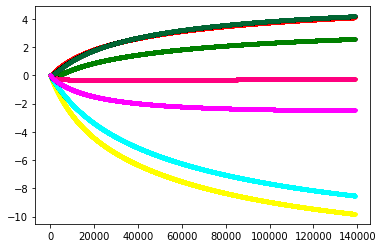

In [129]:
plt.scatter(range(0,i+1),theta_0,c='#ff0000',s=5)
plt.scatter(range(0,i+1),theta_1,c='#008000',s=5)
plt.scatter(range(0,i+1),theta_2,c='#ffff00',s=5)
plt.scatter(range(0,i+1),theta_3,c='#ff007f',s=5)
plt.scatter(range(0,i+1),theta_4,c='#006633',s=5)
plt.scatter(range(0,i+1),theta_5,c='#00ffff',s=5)
plt.scatter(range(0,i+1),theta_6,c='#ff00ff',s=5)

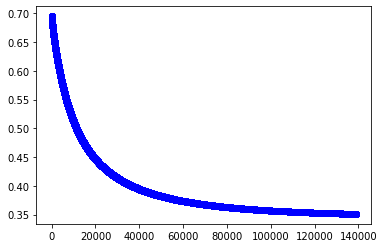

In [130]:
plt.scatter(range(0,i+1),objective,c="#0000ff")